# Aviation Accident Analysis

## Overview

## Problem Statement


Aircraft Damage Severity Distribution

Fatalities by Phase of Flight

Fatality Rate per Aircraft Model

Serious Injury Rate per Aircraft Model


## Data Understanding
The dataset contains aviation accident records, including information on aircraft type, manufacturer, flight phase, weather conditions, and accident outcomes. Key variables include:

## Data Preparation

In [21]:
# Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style("whitegrid")
sns.set_context('talk')

In [22]:
# Loading the dataset
df = pd.read_csv(r'C:\Users\ADMIN\Documents\MoringaSchool\Phase1\Phase1Project\data\AviationData.csv', encoding="latin1", low_memory=False)
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


### Understanding the dataset

In [23]:
# Inspecting the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [24]:
# show the total number of missing values in each column
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

## Data Cleaning and Normalization
Unnecessary columns will be removed, and missing or inconsistent values will be handled to ensure data quality.

In [25]:
# gives the columns names in the dataset
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [26]:
# Keep only relevant columns
relevant_columns = ['Make', 'Model', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Aircraft.damage', 'Broad.phase.of.flight']
df = df[relevant_columns]
df.head()

,Make,Model,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Aircraft.damage,Broad.phase.of.flight
0,Stinson,108-3,2.0,0.0,0.0,0.0,Destroyed,Cruise
1,Piper,PA24-180,4.0,0.0,0.0,0.0,Destroyed,Unknown
2,Cessna,172M,3.0,NaN,NaN,NaN,Destroyed,Cruise
3,Rockwell,112,2.0,0.0,0.0,0.0,Destroyed,Cruise
4,Cessna,501,1.0,2.0,NaN,0.0,Destroyed,Approach


In [27]:
# check missing values
df.isna().sum()

Make                         63
Model                        92
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Aircraft.damage            3194
Broad.phase.of.flight     27165
dtype: int64

- From the missing values in the columns above, I will drop the missing values in the columns ``Make`` and ``Model`` 
- I will replace the columns `Total.Fatal.Injuries`, `Total.Serious.Injuries`, `Total.Minor.Injuries`, `Total.Uninjured`, `Aircraft.damage` and `Broad.phase.of.flight`

### Dealing with missing values

In [28]:
# Drop Make and Model (missing values are a small percentage)
df = df.dropna(subset=['Make', 'Model'])

df = df.reset_index(drop=True)

In [29]:
# rechecking whether they have been removed
df.isna().sum()

Make                          0
Model                         0
Total.Fatal.Injuries      11386
Total.Serious.Injuries    12490
Total.Minor.Injuries      11914
Total.Uninjured            5897
Aircraft.damage            3172
Broad.phase.of.flight     27094
dtype: int64

### Replacing the remaining columns

In [30]:
# Fill missing injury values with 0 (I wamt to assume no reported injury)
injury_cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
df[injury_cols] = df[injury_cols].fillna(0)

In [31]:
# Fill missing aircraft damage and phase of flight with 'Unknown'
df['Aircraft.damage'] = df['Aircraft.damage'].fillna('Unknown')
df['Broad.phase.of.flight'] = df['Broad.phase.of.flight'].fillna('Unknown')

In [32]:
# rechecking whether they have been removed
df.isna().sum()

Make                      0
Model                     0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Aircraft.damage           0
Broad.phase.of.flight     0
dtype: int64

In [33]:
df['Model'].value_counts()

152                   2367
172                   1756
172N                  1164
PA-28-140              932
150                    829
                      ... 
BARON 58                 1
BP GYRO                  1
747 - 468                1
SHORTS SD3-60            1
SKYCYCLE STING RAY       1
Name: Model, Length: 12311, dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88777 entries, 0 to 88776
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Make                    88777 non-null  object 
 1   Model                   88777 non-null  object 
 2   Total.Fatal.Injuries    88777 non-null  float64
 3   Total.Serious.Injuries  88777 non-null  float64
 4   Total.Minor.Injuries    88777 non-null  float64
 5   Total.Uninjured         88777 non-null  float64
 6   Aircraft.damage         88777 non-null  object 
 7   Broad.phase.of.flight   88777 non-null  object 
dtypes: float64(4), object(4)
memory usage: 5.4+ MB


- Now the dataset is clean with no missing values
- The dataset has 88,777 rows and 8 columns

### Fixing Inconsistencies

In [35]:
# Fix inconsistencies in Make and Model columns
df["Make"] = df["Make"].str.title().str.strip()
df["Model"] = df["Model"].str.strip()

### Dealing with the Injuries columns

In [36]:
# Convert the columns to numeric and set as Int64
injury_cols = ["Total.Fatal.Injuries", "Total.Serious.Injuries", "Total.Minor.Injuries", "Total.Uninjured"]

for col in injury_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').astype('Int64')

# Replace missing values in injury columns with 0 (assuming no injuries were reported)
df[injury_cols] = df[injury_cols].fillna(0)

df.head()

,Make,Model,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Aircraft.damage,Broad.phase.of.flight
0,Stinson,108-3,2,0,0,0,Destroyed,Cruise
1,Piper,PA24-180,4,0,0,0,Destroyed,Unknown
2,Cessna,172M,3,0,0,0,Destroyed,Cruise
3,Rockwell,112,2,0,0,0,Destroyed,Cruise
4,Cessna,501,1,2,0,0,Destroyed,Approach


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88777 entries, 0 to 88776
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Make                    88777 non-null  object
 1   Model                   88777 non-null  object
 2   Total.Fatal.Injuries    88777 non-null  Int64 
 3   Total.Serious.Injuries  88777 non-null  Int64 
 4   Total.Minor.Injuries    88777 non-null  Int64 
 5   Total.Uninjured         88777 non-null  Int64 
 6   Aircraft.damage         88777 non-null  object
 7   Broad.phase.of.flight   88777 non-null  object
dtypes: Int64(4), object(4)
memory usage: 5.8+ MB


## Data Analysis

## Objective 1: Aircraft Damage Severity Distribution

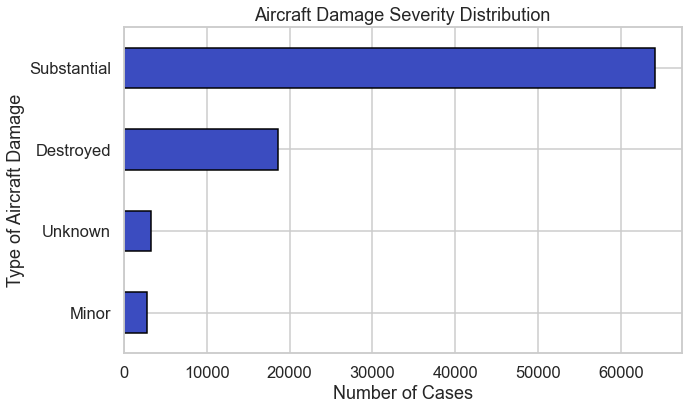

In [38]:
# Group by Aircraft Damage and count occurrences
damage_distribution = df['Aircraft.damage'].value_counts().sort_values(ascending=True)

# Plot a bar chart
plt.figure(figsize=(10, 6))
damage_distribution.plot(kind='barh', colormap='coolwarm', edgecolor="black")

# Set labels and title
plt.xlabel('Number of Cases')
plt.ylabel('Type of Aircraft Damage')
plt.title('Aircraft Damage Severity Distribution')

plt.show()

## Objective 2: Fatalities by Phase of Flight

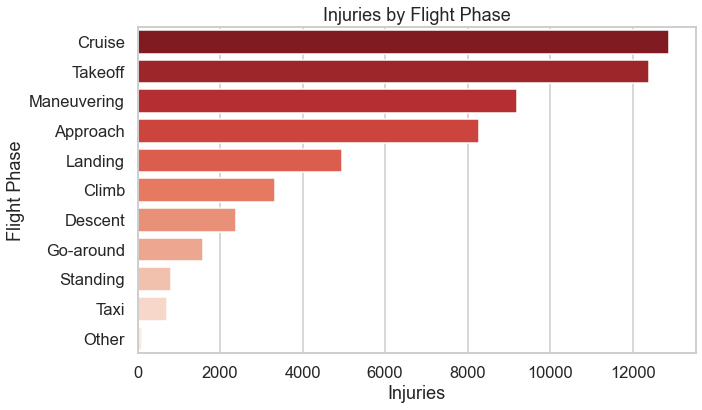

In [39]:
# Create 'Total Injuries' column summing injury types
df["Total Injuries"] = df["Total.Fatal.Injuries"] + df["Total.Serious.Injuries"] + df["Total.Minor.Injuries"]

# Filter out unknown flight phases
df_filtered = df[df["Broad.phase.of.flight"] != "Unknown"]

# Group by Flight Phase and sum the injuries
injuries_by_phase = df_filtered.groupby("Broad.phase.of.flight")["Total Injuries"].sum().reset_index()

# Sort by number of injuries
injuries_by_phase = injuries_by_phase.sort_values(by="Total Injuries", ascending=False)  

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(y="Broad.phase.of.flight", x="Total Injuries", data=injuries_by_phase, palette="Reds_r")

plt.ylabel("Flight Phase")
plt.xlabel("Injuries")
plt.title("Injuries by Flight Phase")

plt.show();

## Objective 3: Fatality Rate per Aircraft Model